In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define deafult font size to generate beautiful plots
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

datapath = Path() / "data" / "housing"
housing = pd.read_csv(datapath / "housing.csv")


In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


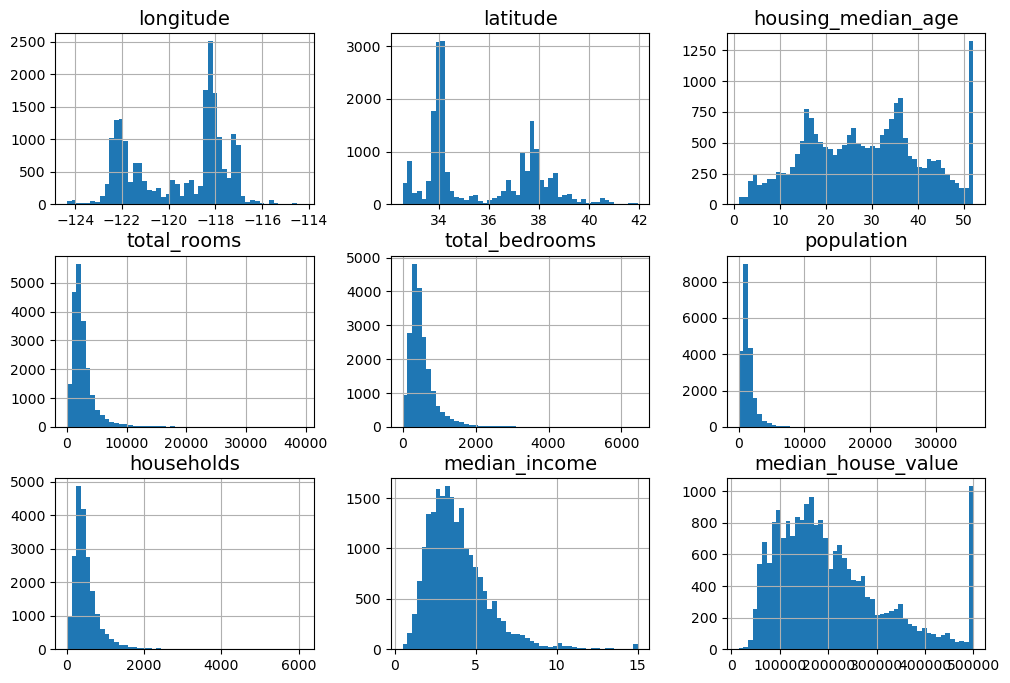

In [7]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [10]:
housing["income_cat"].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [11]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

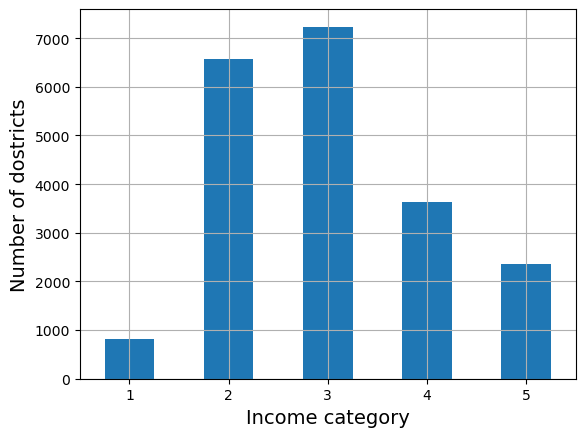

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of dostricts")
plt.show()

In [13]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42)
df_train, df_test = train_test_split(
    housing, test_size=0.3, stratify=housing["income_cat"], random_state=42)

In [14]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall (%)": income_cat_proportions(housing),
    "Stratified (%)": income_cat_proportions(df_test),
    "Random (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified (%)"] /
                                   compare_props["Overall (%)"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random (%)"] /
                                  compare_props["Overall (%)"] - 1)
(compare_props * 100).round(2)

,Overall (%),Stratified (%),Random (%),Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,3.99,4.24,0.16,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.06,34.52,0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [15]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
df_train_eda = df_train.copy()

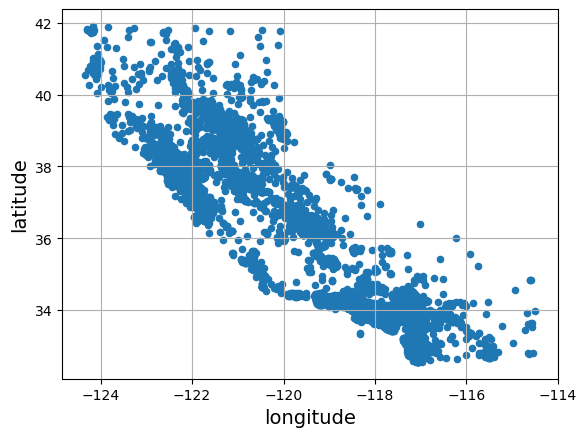

In [17]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

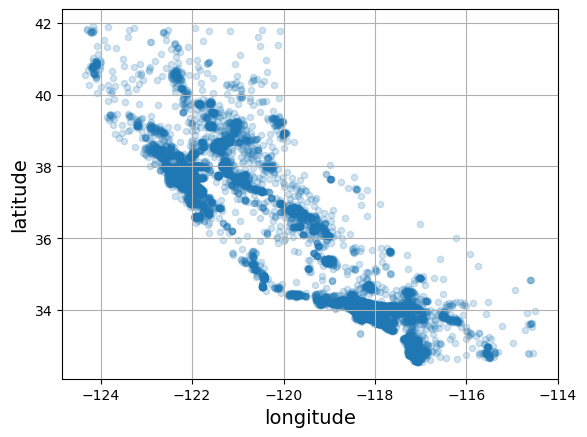

In [18]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

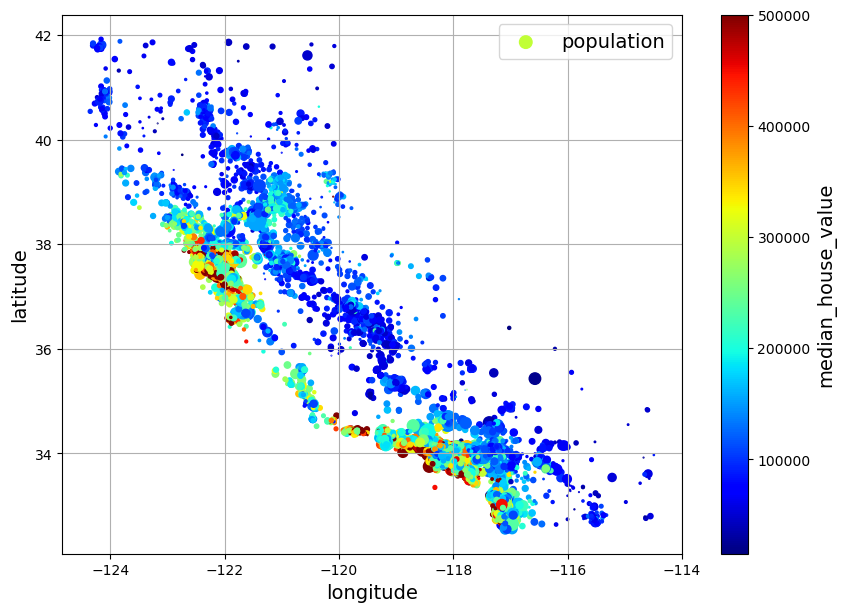

In [19]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

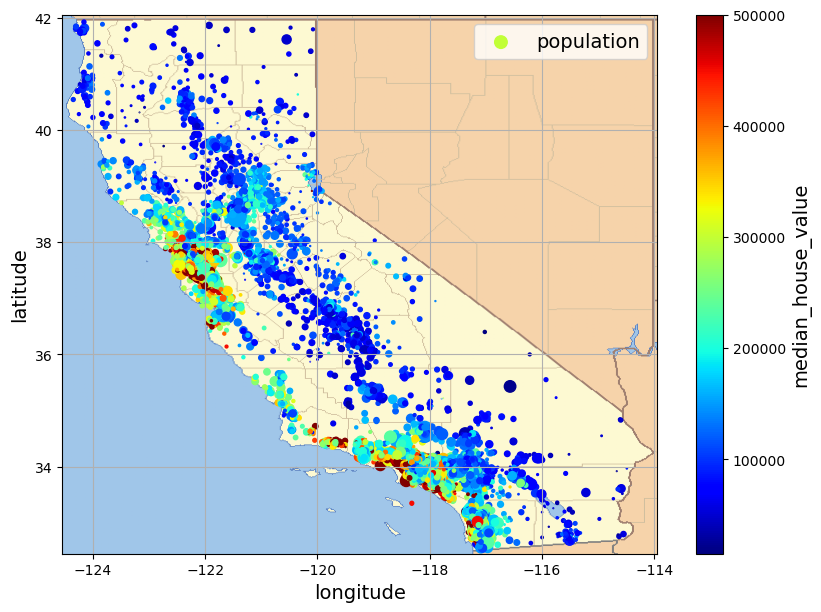

In [20]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_train_eda["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread(datapath / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

In [21]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687394
total_rooms           0.136303
housing_median_age    0.097777
households            0.071050
total_bedrooms        0.053922
population           -0.021273
longitude            -0.053189
latitude             -0.137749
Name: median_house_value, dtype: float64

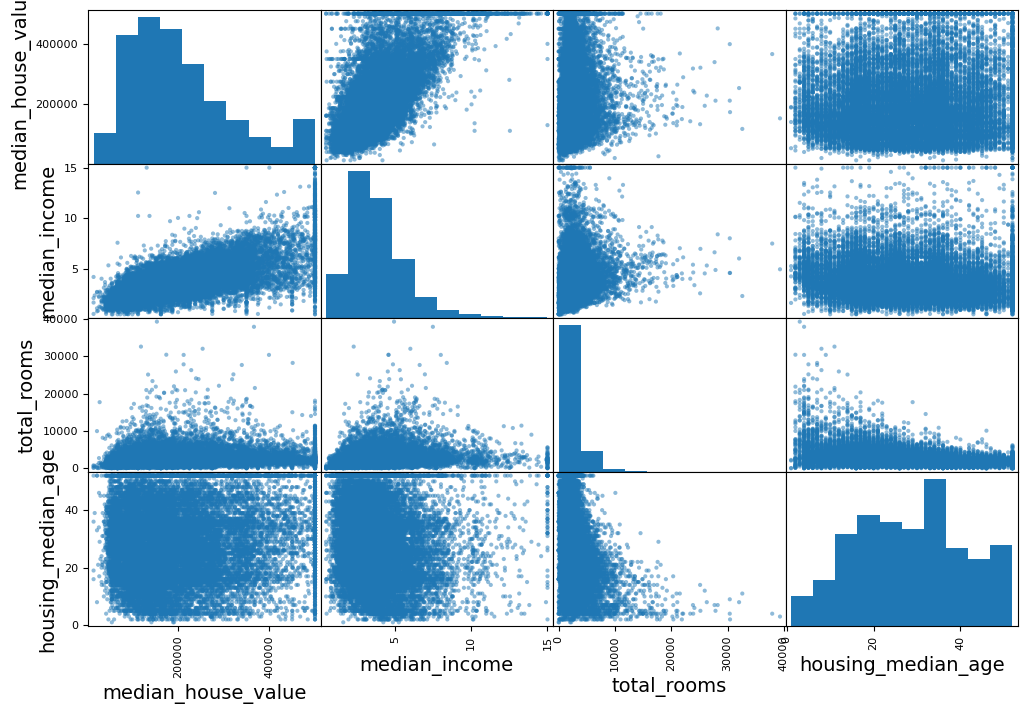

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

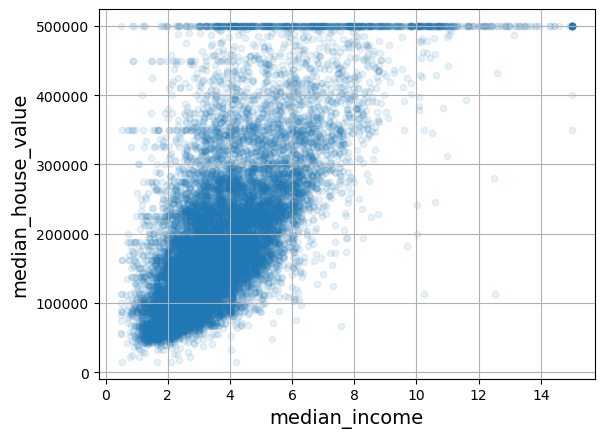

In [24]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

In [25]:
df_train_eda["rooms_per_house"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["bedrooms_ratio"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["people_per_house"] = df_train_eda["population"] / df_train_eda["households"]

In [26]:
corr_matrix = df_train_eda.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687394
rooms_per_house       0.139455
total_rooms           0.136303
housing_median_age    0.097777
households            0.071050
total_bedrooms        0.053922
population           -0.021273
longitude            -0.053189
people_per_house     -0.090992
latitude             -0.137749
bedrooms_ratio       -0.254171
Name: median_house_value, dtype: float64

In [27]:
X_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [28]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        147
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16775,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,NEAR OCEAN
19828,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,NEAR BAY
7506,-122.53,38.32,22.0,3577.0,NaN,1371.0,501.0,5.7950,<1H OCEAN
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
14903,-116.95,32.84,31.0,1307.0,NaN,752.0,231.0,3.4286,<1H OCEAN


In [30]:
X_train_option_1 = X_train.copy()

X_train_option_1.dropna(subset=["total_bedrooms"], inplace=True) 

X_train_option_1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [31]:
X_train_option_2 = X_train.copy()

X_train_option_2.drop("total_bedrooms", axis=1, inplace=True) 

X_train_option_2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16775,-118.30,33.72,35.0,2790.0,1167.0,441.0,6.2028,NEAR OCEAN
19828,-122.08,37.39,4.0,2292.0,1050.0,584.0,4.8036,NEAR BAY
7506,-122.53,38.32,22.0,3577.0,1371.0,501.0,5.7950,<1H OCEAN
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
14903,-116.95,32.84,31.0,1307.0,752.0,231.0,3.4286,<1H OCEAN


In [32]:
X_train_option_3 = X_train.copy()

median = X_train["total_bedrooms"].median()
X_train_option_3["total_bedrooms"].fillna(median, inplace=True)  
X_train_option_3.loc[null_rows_idx].head()

C:\Users\Dominika\AppData\Local\Temp\ipykernel_1096\871747113.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_option_3["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16775,-118.30,33.72,35.0,2790.0,431.0,1167.0,441.0,6.2028,NEAR OCEAN
19828,-122.08,37.39,4.0,2292.0,431.0,1050.0,584.0,4.8036,NEAR BAY
7506,-122.53,38.32,22.0,3577.0,431.0,1371.0,501.0,5.7950,<1H OCEAN
14452,-120.67,40.50,15.0,5343.0,431.0,2503.0,902.0,3.5962,INLAND
14903,-116.95,32.84,31.0,1307.0,431.0,752.0,231.0,3.4286,<1H OCEAN


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
X_train_num = X_train.select_dtypes(include=[np.number])

In [35]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2114.    ,  431.    , 1162.    ,
        407.    ,    3.5385])

In [37]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2114.    ,  431.    , 1162.    ,
        407.    ,    3.5385])

In [38]:
X = imputer.transform(X_train_num)

In [39]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [40]:
X

array([[-122.11  ,   37.98  ,   11.    , ..., 1790.    ,  660.    ,
           6.135 ],
       [-117.1   ,   33.17  ,   12.    , ..., 1226.    ,  428.    ,
           5.4819],
       [-118.06  ,   34.71  ,   14.    , ..., 1228.    ,  512.    ,
           2.5764],
       ...,
       [-122.22  ,   37.79  ,   44.    , ...,  961.    ,  272.    ,
           3.5156],
       [-119.87  ,   36.79  ,    7.    , ..., 1014.    ,  389.    ,
           3.0938],
       [-122.14  ,   37.68  ,   35.    , ..., 1424.    ,  538.    ,
           4.267 ]])

In [41]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns,
                           index=X_train_num.index)

X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6724,-122.11,37.98,11.0,4371.0,679.0,1790.0,660.0,6.1350
4480,-117.10,33.17,12.0,2465.0,412.0,1226.0,428.0,5.4819
6108,-118.06,34.71,14.0,2606.0,514.0,1228.0,512.0,2.5764
16099,-122.28,38.31,52.0,58.0,18.0,48.0,22.0,1.7600
8664,-118.51,34.22,36.0,1493.0,285.0,766.0,272.0,4.8646
...,...,...,...,...,...,...,...,...
13507,-118.09,33.90,37.0,1147.0,258.0,742.0,242.0,4.0461
14450,-122.22,38.11,43.0,1939.0,353.0,968.0,392.0,3.1848
15432,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156
4642,-119.87,36.79,7.0,1932.0,419.0,1014.0,389.0,3.0938


In [42]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16775,-118.30,33.72,35.0,2790.0,431.0,1167.0,441.0,6.2028
19828,-122.08,37.39,4.0,2292.0,431.0,1050.0,584.0,4.8036
7506,-122.53,38.32,22.0,3577.0,431.0,1371.0,501.0,5.7950
14452,-120.67,40.50,15.0,5343.0,431.0,2503.0,902.0,3.5962
14903,-116.95,32.84,31.0,1307.0,431.0,752.0,231.0,3.4286


In [43]:
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")

X = imputer.fit_transform(X_train_num)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6724,-122.11,37.98,11.0,4371.0,679.0,1790.0,660.0,6.1350
4480,-117.10,33.17,12.0,2465.0,412.0,1226.0,428.0,5.4819
6108,-118.06,34.71,14.0,2606.0,514.0,1228.0,512.0,2.5764
16099,-122.28,38.31,52.0,58.0,18.0,48.0,22.0,1.7600
8664,-118.51,34.22,36.0,1493.0,285.0,766.0,272.0,4.8646
...,...,...,...,...,...,...,...,...
13507,-118.09,33.90,37.0,1147.0,258.0,742.0,242.0,4.0461
14450,-122.22,38.11,43.0,1939.0,353.0,968.0,392.0,3.1848
15432,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156
4642,-119.87,36.79,7.0,1932.0,419.0,1014.0,389.0,3.0938


In [44]:
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16775,-118.30,33.72,35.0,2790.0,431.0,1167.0,441.0,6.2028
19828,-122.08,37.39,4.0,2292.0,431.0,1050.0,584.0,4.8036
7506,-122.53,38.32,22.0,3577.0,431.0,1371.0,501.0,5.7950
14452,-120.67,40.50,15.0,5343.0,431.0,2503.0,902.0,3.5962
14903,-116.95,32.84,31.0,1307.0,431.0,752.0,231.0,3.4286


In [45]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
6724,NEAR BAY
4480,<1H OCEAN
6108,INLAND
16099,NEAR BAY
8664,<1H OCEAN
15542,NEAR BAY
9662,<1H OCEAN
14679,INLAND


In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [47]:
X_train_cat_encoded.head()

,ocean_proximity
6724,3.0
4480,0.0
6108,1.0
16099,3.0
8664,0.0


In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_deafult = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_cat_1hot_deafult_df = cat_encoder_deafult.fit_transform(X_train_cat)
X_train_cat_1hot_deafult_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6724,0.0,0.0,0.0,1.0,0.0
4480,1.0,0.0,0.0,0.0,0.0
6108,0.0,1.0,0.0,0.0,0.0
16099,0.0,0.0,0.0,1.0,0.0
8664,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
13507,1.0,0.0,0.0,0.0,0.0
14450,0.0,0.0,0.0,1.0,0.0
15432,0.0,0.0,0.0,1.0,0.0
4642,0.0,1.0,0.0,0.0,0.0


In [50]:
sample_df = pd.DataFrame({"ocean_proximity"}:["INLAND", "NEAR BAY"])


SyntaxError: invalid syntax (390367200.py, line 1)